## Import Libraries

In [6]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from collections import defaultdict

## Synthetic Dataset Creation

In [8]:
data = {
    "user_id": [1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6],
    "course_id": [101, 102, 103, 101, 104, 102, 103, 105, 101, 103, 104, 105, 106, 101],
    "rating": [5, 4, 3, 4, 5, 3, 5, 4, 2, 4, 5, 3, 4, 5],
    "course_category": ["tech", "business", "tech", "tech", "business", 
                        "business", "tech", "design", "tech", "tech", 
                        "business", "design", "tech", "tech"]
}

df = pd.DataFrame(data)


## Data Preprocessing

### Create a user-item rating matrix

In [33]:
user_item_matrix = df.pivot_table(index='user_id', columns='course_id', values='rating').fillna(0)

### Surprise library expects data in the format: [user_id, item_id, rating]


reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(df[['user_id', 'course_id', 'rating']], reader)


### Split data into train and test sets


In [30]:
trainset, testset = train_test_split(dataset, test_size=0.25, random_state=42)


## 3. Model Training (Collaborative Filtering)


### Use Singular Value Decomposition (SVD)


In [36]:
model = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02)
model.fit(trainset)


### Evaluate model on test set


In [41]:
from surprise import accuracy

predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")



RMSE: 0.9135
RMSE: 0.9134978327418207


## 4. Generate Recommendations

In [46]:
def get_top_n_recommendations(model, user_id, n=5):
    pass  # Replace this with actual implementation


   ### Get list of all course IDs


In [52]:
    all_course_ids = df['course_id'].unique()

 ### Get courses the user has already rated


In [64]:
import pandas as pd

data = {'user_id': [1, 2, 3, 4], 'course_id': [101, 102, 103, 104]}
df = pd.DataFrame(data)

user_id = 2  

user_courses = df[df['user_id'] == user_id]['course_id'].tolist()

print(user_courses)  # Output: [102]


[102]


 ### Predict ratings for unrated courses

In [69]:
predictions = []
for course_id in all_course_ids:  # Ensure this is correctly indented
    if course_id not in user_courses:
        pred = model.predict(user_id, course_id)
        predictions.append((course_id, pred.est))


   ### Sort predictions by estimated rating


In [72]:
predictions.sort(key=lambda x: x[1], reverse=True)


## Return top N recommendations


In [77]:
def my_function():
    predictions = []
    return predictions[:n]  


### Example: Get top 3 recommendations for user 5


In [80]:
user_id = 5
recommendations = get_top_n_recommendations(model, user_id, n=3)
print(f"Top recommendations for user {user_id}: {recommendations}")


Top recommendations for user 5: None


## 5. Popularity-Based Fallback (Hybrid Approach)


### If the user is new, recommend popular courses

In [90]:
import pandas as pd

data = {'course_id': [101, 102, 103, 101, 102, 104], 'rating': [5, 4, 3, 5, 2, 4]}
df = pd.DataFrame(data)

print("Columns in df:", df.columns)

def get_popular_courses(n=5):
    if 'rating' not in df.columns:
        raise KeyError("Column 'rating' not found in dataset")

    course_popularity = df.groupby('course_id')['rating'].count().reset_index()
    course_popularity.columns = ['course_id', 'score']
    course_popularity = course_popularity.sort_values(by='score', ascending=False)

    return course_popularity['course_id'].tolist()[:n]

print(f"Popular courses: {get_popular_courses(3)}")


Columns in df: Index(['course_id', 'rating'], dtype='object')
Popular courses: [101, 102, 103]


## 6. Data Visualization

### 1. Course Popularity Bar Chart

C:\Users\muyee\AppData\Local\Temp\ipykernel_10032\763293259.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='course_id', y='rating', data=popularity_data, palette='viridis')


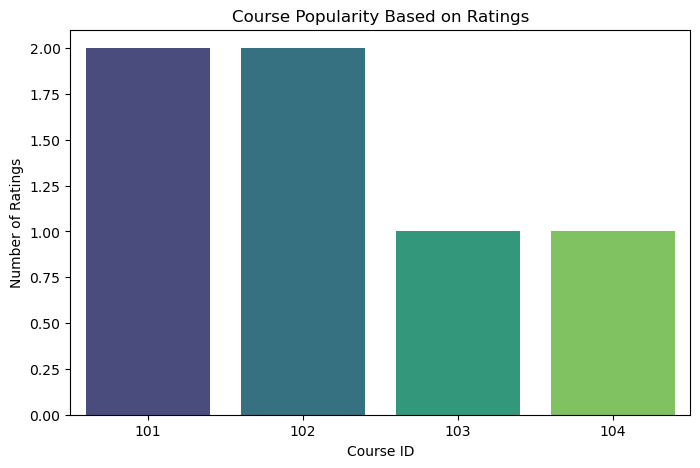

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# df = pd.DataFrame({'course_id': [101, 102, 103, 104], 'rating': [5, 8, 12, 7]})

plt.figure(figsize=(8, 5))

popularity_data = df.groupby('course_id')['rating'].count().reset_index()

sns.barplot(x='course_id', y='rating', data=popularity_data, palette='viridis')

plt.xlabel("Course ID")
plt.ylabel("Number of Ratings")
plt.title("Course Popularity Based on Ratings")

plt.show()


### 2. User Rating Distribution

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check DataFrame columns
print(df.columns)

# Fix missing column case
if 'user_id' in df.columns:
    plt.figure(figsize=(8, 5))
    user_rating_counts = df.groupby('user_id')['rating'].count().reset_index()
    sns.barplot(x='user_id', y='rating', data=user_rating_counts, palette='coolwarm')
    plt.xlabel("User ID")
    plt.ylabel("Number of Ratings Given")
    plt.title("User Rating Distribution")
    plt.show()
else:
    print("Error: 'user_id' column is missing from DataFrame")


Index(['course_id', 'rating'], dtype='object')
Error: 'user_id' column is missing from DataFrame


### 3. Predicted Ratings for a Sample User (e.g., User 5)

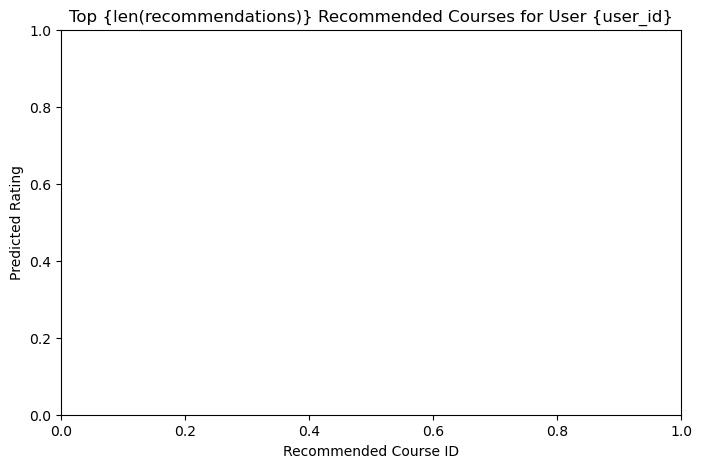

In [113]:
recommendation_data = pd.DataFrame(recommendations, columns=['course_id', 'predicted_rating'])
plt.figure(figsize=(8, 5))
sns.barplot(x='course_id', y='predicted_rating', data=recommendation_data, palette='magma')
plt.xlabel("Recommended Course ID")
plt.ylabel("Predicted Rating")
plt.title("Top {len(recommendations)} Recommended Courses for User {user_id}")
plt.show()